In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

# Extract target variable
Y = data['Class'].to_numpy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

# Create a pipeline for logistic regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Define parameters for grid search
lr_parameters = {'logreg__C':[0.01,0.1,1],
                 'logreg__penalty':['l2'],
                 'logreg__solver':['lbfgs']}

# Create GridSearchCV object for logistic regression
lr_grid = GridSearchCV(lr_pipeline, lr_parameters, cv=10)

# Fit the logistic regression model
lr_grid.fit(X_train, Y_train)

# Create a pipeline for support vector machine
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Define parameters for grid search
svm_parameters = {'svm__kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
                  'svm__C': np.logspace(-3, 3, 5),
                  'svm__gamma':np.logspace(-3, 3, 5)}

# Create GridSearchCV object for support vector machine
svm_grid = GridSearchCV(svm_pipeline, svm_parameters, cv=10, n_jobs=-1)

# Fit the support vector machine model
svm_grid.fit(X_train, Y_train)

# Create a pipeline for decision tree classifier
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

# Define parameters for grid search
tree_parameters = {'tree__criterion': ['gini', 'entropy'],
                   'tree__splitter': ['best', 'random'],
                   'tree__max_depth': [2*n for n in range(1,10)],
                   'tree__max_features': [None, 'log2', 'sqrt', 1, 0.5],
                   'tree__min_samples_leaf': [1, 2, 4],
                   'tree__min_samples_split': [2, 5, 10]}

# Create GridSearchCV object for decision tree classifier
tree_grid = GridSearchCV(tree_pipeline, tree_parameters, cv=10)

# Fit the decision tree classifier model
tree_grid.fit(X_train, Y_train)

# Create a pipeline for k nearest neighbors
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameters for grid search
knn_parameters = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'knn__p': [1,2]}

# Create GridSearchCV object for k nearest neighbors
knn_grid = GridSearchCV(knn_pipeline, knn_parameters, cv=10)

# Fit the k nearest neighbors model
knn_grid.fit(X_train, Y_train)

# Print best parameters and scores for each model
print("Logistic Regression - Best Parameters:", lr_grid.best_params_)
print("Logistic Regression - Best Score:", lr_grid.best_score_)

print("Support Vector Machine - Best Parameters:", svm_grid.best_params_)
print("Support Vector Machine - Best Score:", svm_grid.best_score_)

print("Decision Tree - Best Parameters:", tree_grid.best_params_)
print("Decision Tree - Best Score:", tree_grid.best_score_)

print("K Nearest Neighbors - Best Parameters:", knn_grid.best_params_)
print("K Nearest Neighbors - Best Score:", knn_grid.best_score_)


Logistic Regression - Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Logistic Regression - Best Score: 0.8464285714285713
Support Vector Machine - Best Parameters: {'svm__C': 0.03162277660168379, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
Support Vector Machine - Best Score: 0.8214285714285714
Decision Tree - Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 12, 'tree__max_features': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 5, 'tree__splitter': 'best'}
Decision Tree - Best Score: 0.8714285714285713
K Nearest Neighbors - Best Parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__p': 1}
K Nearest Neighbors - Best Score: 0.8482142857142858


In [12]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors'],
    'Best Parameters': [
        "{'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}",
        "{'svm__C': 0.03162277660168379, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}",
        "{'tree__criterion': 'gini', 'tree__max_depth': 12, 'tree__max_features': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 5, 'tree__splitter': 'best'}",
        "{'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__p': 1}"
    ],
    'Best Score': [0.8464285714285713, 0.8214285714285714, 0.8714285714285713, 0.8482142857142858]
}

df = pd.DataFrame(data)
df


,Model,Best Parameters,Best Score
0,Logistic Regression,"{'logreg__C': 0.01, 'logreg__penalty': 'l2', '...",0.846429
1,Support Vector Machine,"{'svm__C': 0.03162277660168379, 'svm__gamma': ...",0.821429
2,Decision Tree,"{'tree__criterion': 'gini', 'tree__max_depth':...",0.871429
3,K Nearest Neighbors,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",0.848214


Based on the provided information, the Decision Tree model achieved the highest best score of 0.8714 among all models. Therefore, based on this criterion, the Decision Tree model performs better compared to Logistic Regression, Support Vector Machine, and K Nearest Neighbors. However, it's important to note that model performance can vary based on different evaluation metrics, datasets, and problem contexts. So, the choice of the best-performing model may ultimately depend on your specific requirements and considerations.

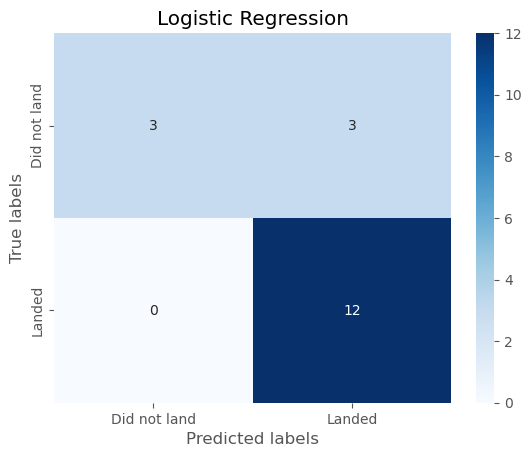

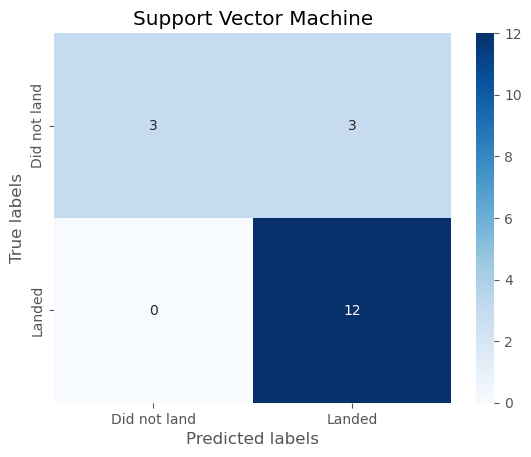

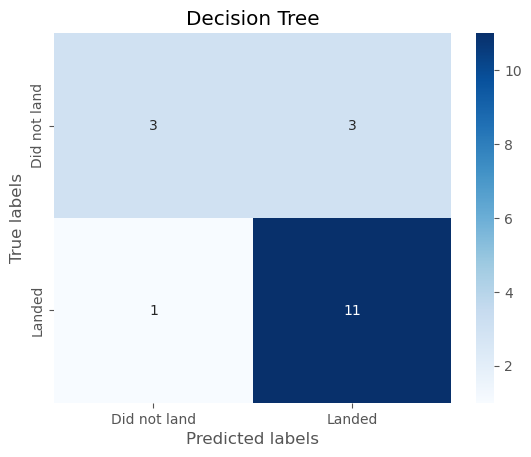

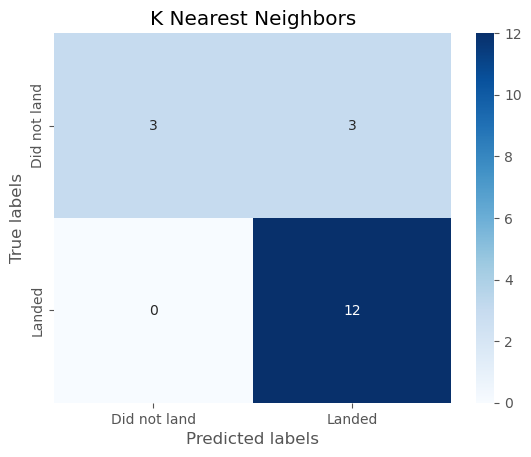

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Did not land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did not land', 'Landed'])
    plt.show()

# Predictions for all models
y_pred_lr = lr_grid.predict(X_test)
y_pred_svm = svm_grid.predict(X_test)
y_pred_tree = tree_grid.predict(X_test)
y_pred_knn = knn_grid.predict(X_test)

# Plot confusion matrices for all models
plot_confusion_matrix(Y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(Y_test, y_pred_svm, 'Support Vector Machine')
plot_confusion_matrix(Y_test, y_pred_tree, 'Decision Tree')
plot_confusion_matrix(Y_test, y_pred_knn, 'K Nearest Neighbors')

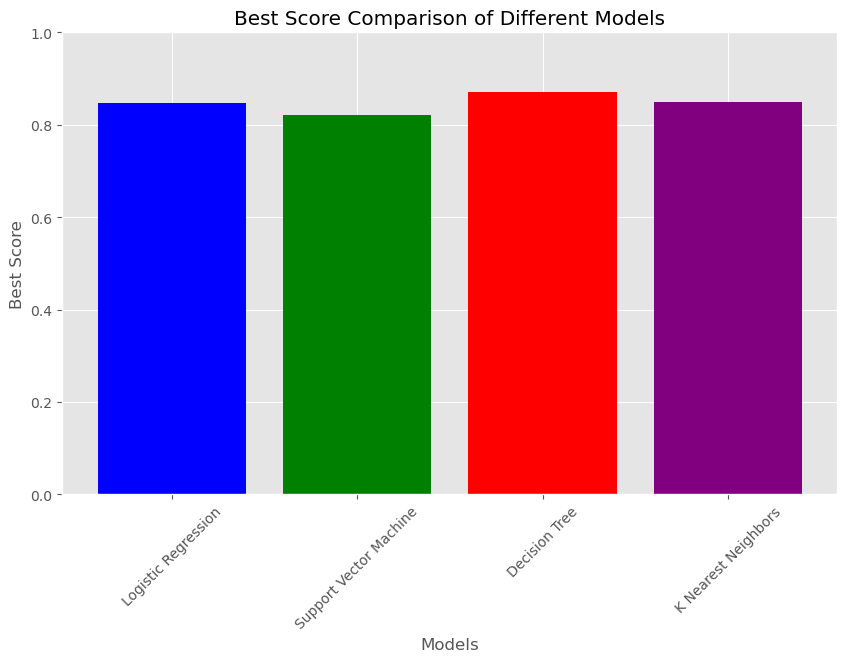

In [15]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors']

# Best scores of all models
best_scores = [0.8464285714285713, 0.8214285714285714, 0.8714285714285713, 0.8482142857142858]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, best_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Best Score')
plt.title('Best Score Comparison of Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [10]:
import pandas as pd
from sklearn.metrics import classification_report

# Make predictions on the test set for all models
lr_predictions = lr_grid.predict(X_test)
svm_predictions = svm_grid.predict(X_test)
tree_predictions = tree_grid.predict(X_test)
knn_predictions = knn_grid.predict(X_test)

# Generate classification reports for all models
lr_report = classification_report(Y_test, lr_predictions, output_dict=True)
svm_report = classification_report(Y_test, svm_predictions, output_dict=True)
tree_report = classification_report(Y_test, tree_predictions, output_dict=True)
knn_report = classification_report(Y_test, knn_predictions, output_dict=True)

# Extract relevant information from classification reports
reports_data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors'],
    'Precision_0': [lr_report['0']['precision'], svm_report['0']['precision'], tree_report['0']['precision'], knn_report['0']['precision']],
    'Precision_1': [lr_report['1']['precision'], svm_report['1']['precision'], tree_report['1']['precision'], knn_report['1']['precision']],
    'Recall_0': [lr_report['0']['recall'], svm_report['0']['recall'], tree_report['0']['recall'], knn_report['0']['recall']],
    'Recall_1': [lr_report['1']['recall'], svm_report['1']['recall'], tree_report['1']['recall'], knn_report['1']['recall']],
    'F1-score_0': [lr_report['0']['f1-score'], svm_report['0']['f1-score'], tree_report['0']['f1-score'], knn_report['0']['f1-score']],
    'F1-score_1': [lr_report['1']['f1-score'], svm_report['1']['f1-score'], tree_report['1']['f1-score'], knn_report['1']['f1-score']],
    'Support': [lr_report['macro avg']['support'], svm_report['macro avg']['support'], tree_report['macro avg']['support'], knn_report['macro avg']['support']],
    'Accuracy': [lr_report['accuracy'], svm_report['accuracy'], tree_report['accuracy'], knn_report['accuracy']]
}

# Create DataFrame
df_classification_reports = pd.DataFrame(reports_data)

# Display the DataFrame
df_classification_reports


,Model,Precision_0,Precision_1,Recall_0,Recall_1,F1-score_0,F1-score_1,Support,Accuracy
0,Logistic Regression,1.00,0.800000,0.5,1.000000,0.666667,0.888889,18.0,0.833333
1,Support Vector Machine,1.00,0.800000,0.5,1.000000,0.666667,0.888889,18.0,0.833333
2,Decision Tree,0.75,0.785714,0.5,0.916667,0.600000,0.846154,18.0,0.777778
3,K Nearest Neighbors,1.00,0.800000,0.5,1.000000,0.666667,0.888889,18.0,0.833333


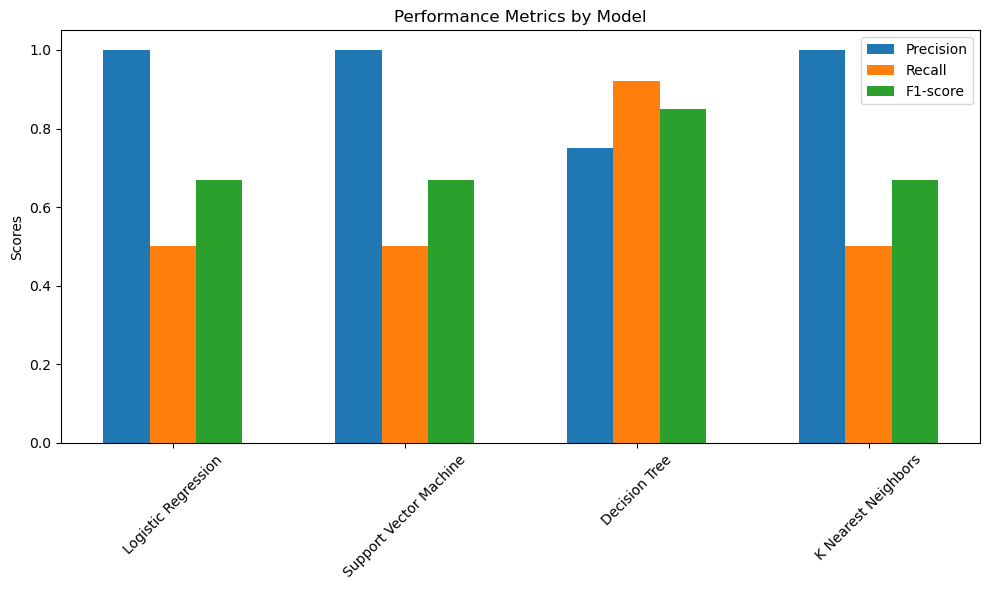

In [6]:
import matplotlib.pyplot as plt

# Define precision, recall, and F1-score for each model
precision = [1.00, 1.00, 0.75, 1.00]  # Replace with precision scores for each model
recall = [0.50, 0.50, 0.92, 0.50]  # Replace with recall scores for each model
f1_score = [0.67, 0.67, 0.85, 0.67]  # Replace with F1-scores for each model
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors']

# Create bar chart
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, precision, width, label='Precision')
ax.bar([i + width for i in x], recall, width, label='Recall')
ax.bar([i + 2 * width for i in x], f1_score, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
data.head()

AttributeError: 'dict' object has no attribute 'head'

In [18]:
data

{'Model': ['Logistic Regression',
  'Support Vector Machine',
  'Decision Tree',
  'K Nearest Neighbors'],
 'Best Parameters': ["{'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}",
  "{'svm__C': 0.03162277660168379, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}",
  "{'tree__criterion': 'gini', 'tree__max_depth': 12, 'tree__max_features': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 5, 'tree__splitter': 'best'}",
  "{'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__p': 1}"],
 'Best Score': [0.8464285714285713,
  0.8214285714285714,
  0.8714285714285713,
  0.8482142857142858]}